In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.colors as mcolors
from scipy.stats import gaussian_kde

main_path = "/Users/sebastianhejbergingesen/Downloads"

In [2]:
path = f"{main_path}/Map/GeoJson/market_penetration_gps.csv"
df = pd.read_csv(path)
geometry = [Point(lon, lat) for lat, lon in zip(df["latitude"], df["longitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
customers_points = gdf.to_crs(epsg=3857)
customers_points = customers_points[["geometry"]]

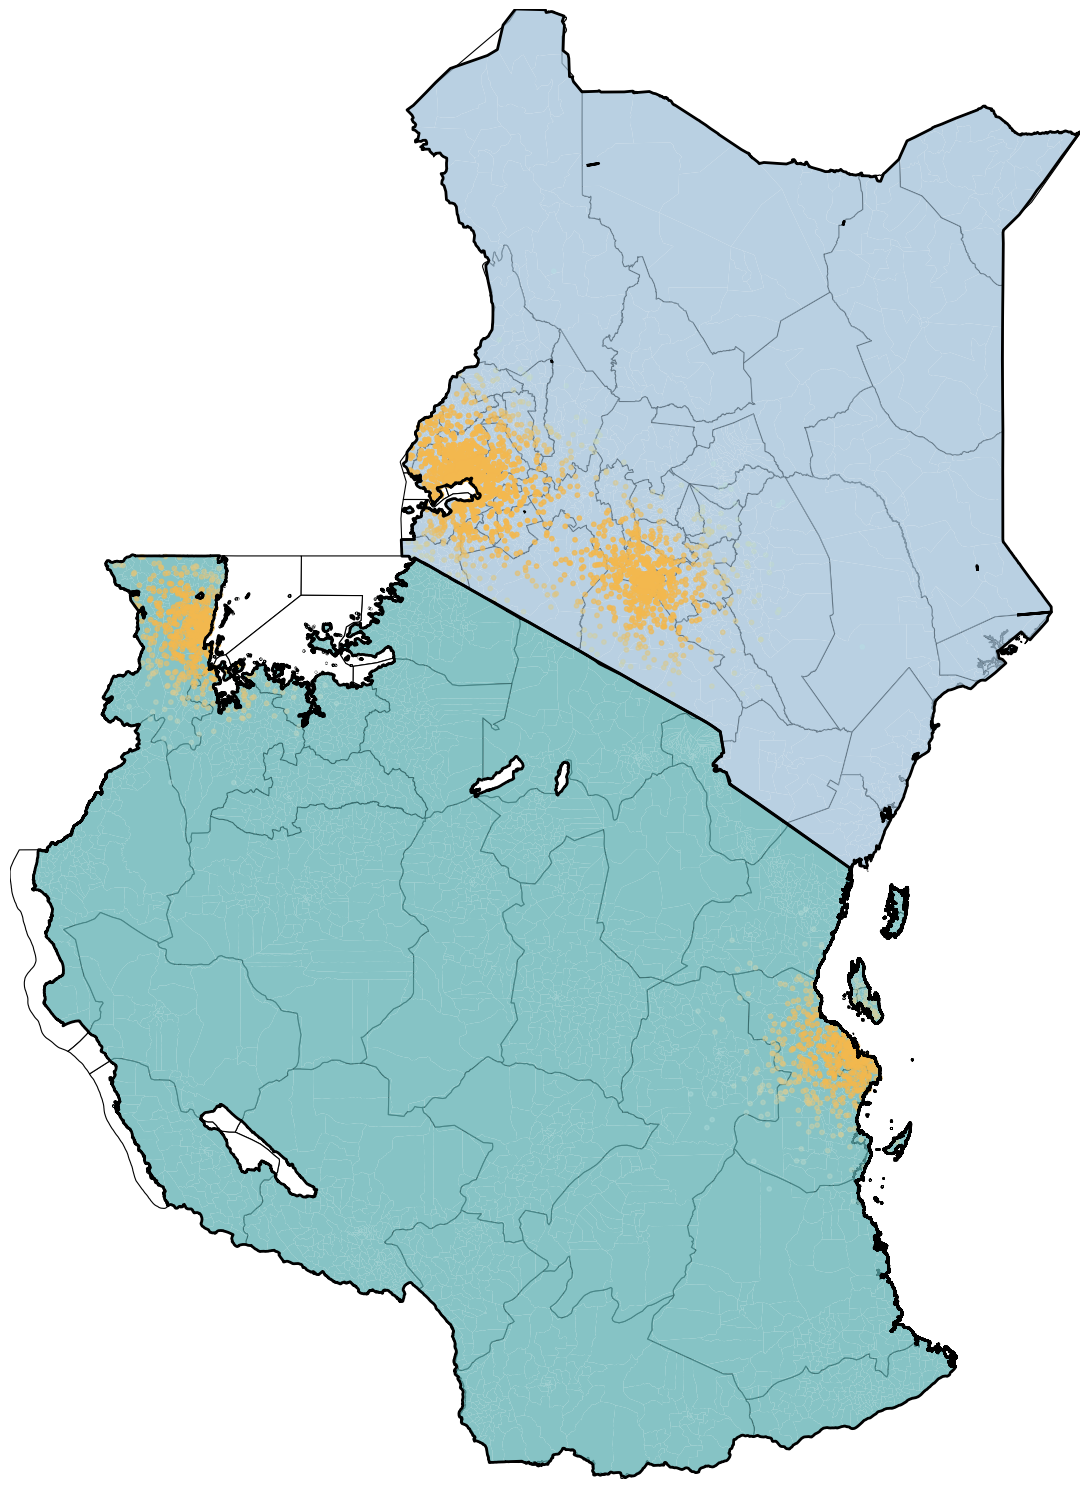

In [3]:
# Tanzania
tanzania_path_1 = f"{main_path}/Map/GeoJson/geoBoundaries-TZA-ADM0.geojson"
tanzania_path_1 = f"{main_path}/Map/GeoJson/geoBoundaries-TZA-ADM1.geojson"
tanzania_path =   f"{main_path}/Map/GeoJson/geoBoundaries-TZA-ADM3.geojson"

Tanzania = gpd.read_file(tanzania_path).to_crs(epsg=3857)
Tanzania_border = gpd.read_file(tanzania_path_1).to_crs(epsg=3857)

# Kenya  
kenya_path_1 = f"{main_path}/Map/GeoJson/geoBoundaries-KEN-ADM0.geojson"
kenya_path_1 = f"{main_path}/Map/GeoJson/geoBoundaries-KEN-ADM1.geojson"
kenya_path =   f"{main_path}/Map/GeoJson/geoBoundaries-KEN-ADM3.geojson"

Kenya = gpd.read_file(kenya_path).to_crs(epsg=3857)
Kenya_border = gpd.read_file(kenya_path_1).to_crs(epsg=3857)


tanzania_border = Tanzania.geometry.union_all().boundary
kenya_border = Kenya.geometry.union_all().boundary

minx, miny, maxx, maxy =  min(Tanzania_border.total_bounds[0], Kenya.total_bounds[0]), \
                          min(Tanzania_border.total_bounds[1], Kenya.total_bounds[1]), \
                          max(Tanzania_border.total_bounds[2], Kenya.total_bounds[2]), \
                          max(Tanzania_border.total_bounds[3], Kenya.total_bounds[3])

output_path = f"{main_path}/market_penetration.pdf"


fig, ax = plt.subplots(figsize=(15, 15))
Tanzania_border.plot(ax=ax, edgecolor="black", facecolor="white", alpha=1, linewidth=0.8)
Kenya_border.plot(ax=ax, edgecolor="black", facecolor="white", alpha=1, linewidth=0.8)
gpd.GeoSeries([tanzania_border, kenya_border]).plot(ax=ax, edgecolor='black', linewidth=2)
Tanzania.plot(ax=ax, edgecolor=None, facecolor=(96/255,177/255,179/255), alpha=0.76)
Kenya.plot(ax=ax, edgecolor=None, facecolor=(164/255,194/255,217/255), alpha=0.76)
x_vals = [point.x for point in customers_points.geometry]
y_vals = [point.y for point in customers_points.geometry]
xy = np.vstack([x_vals, y_vals])
kde = gaussian_kde(xy)(xy)
norm = mcolors.Normalize(vmin=kde.min(), vmax=kde.max())
colors = [(183/255,228/255,231/255), (243/255, 184/255, 78/255), (244/255, 184/255, 78/255)]
custom_plasma = mcolors.LinearSegmentedColormap.from_list("custom_plasma", colors, N=256)
colors = custom_plasma(norm(kde))
alpha_values = 0.3 + 0.7 * norm(kde)
customers_points.plot(ax=ax, color=colors, markersize=10, alpha=alpha_values)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_axis_off()
plt.tight_layout()
plt.savefig(output_path, transparent=True, bbox_inches='tight')
plt.show()